---
title: "All about OLS"
format:
  html:
    toc: true
    html-math-method: katex
    theme: lux
---

"At a basic level, machine learning is about predicting the future
based on the past. For instance, you might wish to predict how much
a user Alice will like a movie that she hasn’t seen, based on her ratings of movies that she has seen. This prediction could be based on
many factors of the movies: their category (drama, documentary,
etc.), the language, the director and actors, the production company,
etc. In general, this means making informed guesses about some unobserved property of some object, based on observed properties of
that object" - Hal Daumé III

This is the first paragraph of the excellent book on machine learning <em>A Course in Machine Learning</em> by Hal Daumé III. The First chapter of the book delves into decision trees which is a great starting point, but we're choosing a different one. We're going to start with explaining the Ordinary Least Squares Regression which is also covered but gives in my opinion a less human centric view of creating models. 

Let's start with defining what a model is in the context of machine learning. We will expand on the definition later, but for now a model is a guess about a target given some set of features. We denote a model here as $\hat{y}$. We are given a set of targets, $Y$, that correspond to a set of features given by $X$. Notice we capitalize $Y$ and $X$ because we these variables are generally matrices. We want to assume that for every $y_i = f(x_i) + \epsilon$ where $f(x_i)$ is the true value and $\epsilon$ is noise or some amount of randomness. We want to find some model, $\hat{y}$, where $\hat{y} \approx f(x_i)$, or in other words, we want our guesses to be a close to the value of our target without noise. Notice that $\hat{y}$ could be anything. It does not need to be related to any features at all, we could have $\hat{y}_i = 1$ for all of our data if we wanted to. 

This isn't explicitly machine learning but let's try a simple modeling problem.

In [36]:
using Plots, LinearAlgebra, LaTeXStrings

The scatter plot shows our training data generated from the function $y_i = 2x_i +\epsilon$ where our truth is $f(x_i) = 2x_i$. We attempt to find a model that estimates $f(x_i)$ as closely as possible.

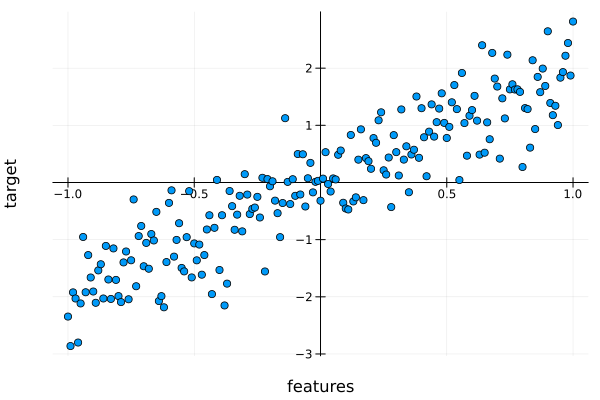

In [37]:
X = -1:.01:1 |> collect
Y = 2 .* X .+ randn(length(X)) * 0.5
plot(X, Y, seriestype = :scatter, xaxis = ("features"), yaxis = ("target"), legend = false, framestyle = :origin)

If you didn't already know the true value maybe you assume that it's $1.9x$.

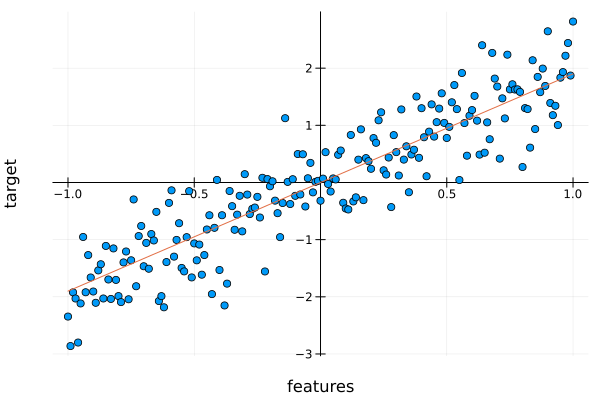

In [38]:
plot(X, Y, seriestype = :scatter, xaxis = ("features"), yaxis = ("target"), legend = false, framestyle = :origin); plot!(x -> 1.9x)

It looks right, and if you all you needed was an estimate for the general direction of the data it would work, but we'll see the advantage of having a clearly defined metric later on. For right now lets try to find some metrics for evaluating our guess. One that's immediately intuitive metric is adding up the errors of the model. 

In [39]:
error = 0
for (xi, yi) in zip(X, Y)
    error += yi - 1.9xi
end
error

-1.6097571579893621

The sum of the errors is around 5.05. Let's make another guess, $\hat{y_i} = 2.2x_i$

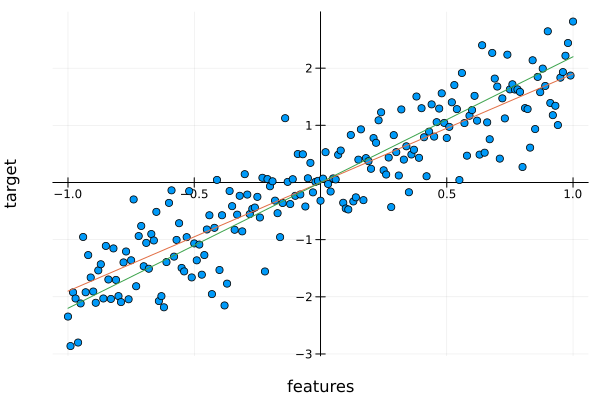

In [40]:
plot!(x -> 2.2x)

In [41]:
error = 0
for (xi, yi) in zip(X, Y)
    error += yi - 2.2xi
end
error

-1.6097571579893613

Assuming we are only guessing lines with no intercepts of form $\hat{y_i} = w*x_i$ we can plot the relationship between the sum of errors of any given model $\hat{y_i}$ at $w$

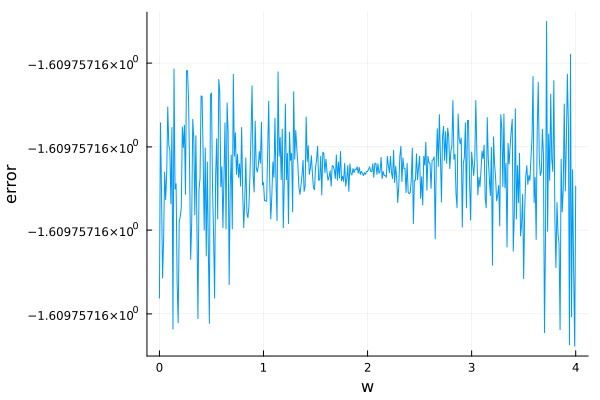

In [42]:
errors = Dict()
for w in 0:.01:4
    error = 0
    for (xi, yi) in zip(X, Y)
        error += yi - w*xi
    end
    errors[w] = error
end
plot(errors, xaxis = ("w"), yaxis = ("error"), legend = false)

What a messy function. We can see a general trend in that as $w$ approaches 2 the error gets closer to 0, but that's where the utility of this metric ends. We aren't guaranteed a smaller error as we approach the value of $w$ that brings us closest to the true function. How do we even interpret negative error? If a line has both negative errors and positive errors this metric will cancel them out and that's most likely what's leading to the relatively small variations in the metric. Let's try a different approach, taking the sum of the squares of the errors.

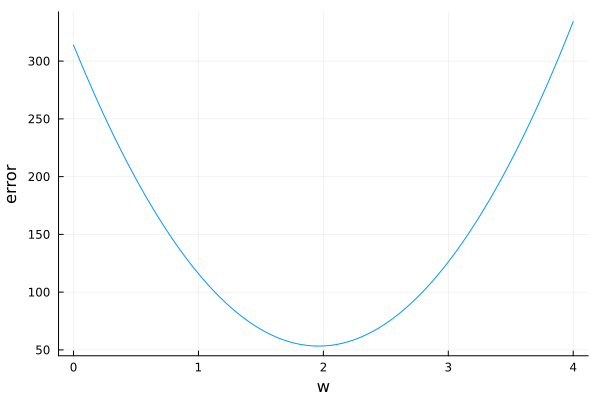

In [43]:
errors = Dict()
for w in 0:.01:4
    error = 0
    for (xi, yi) in zip(X, Y)
        error += (yi - w*xi)^2
    end
    errors[w] = error
end
plot(errors, xaxis = ("w"), yaxis = ("error"), legend = false)

Much better. This metric continuously decreases as our model gets closer to the truth and also looks suspiciously like a parabola for which we have methods for finding the value of w that minimizes the function. 

I have a confession, we've been using the term metric wrong. Metric has a specific connotation within machine learning. The two "metrics" we've developed are more appropriately called loss functions. We can consider the first one just sum of errors, and it really isn't a great loss function. The second one you might have seen before, the Sum of Squared Errors and the minimization of this function with respect to different models is generally called OLS (Ordinary Least Squares). 

You might be wondering why we didn't just use the sum of absolute values of the errors, that loss function has its own applications that can be explained through the differences in the geometries of these functions.

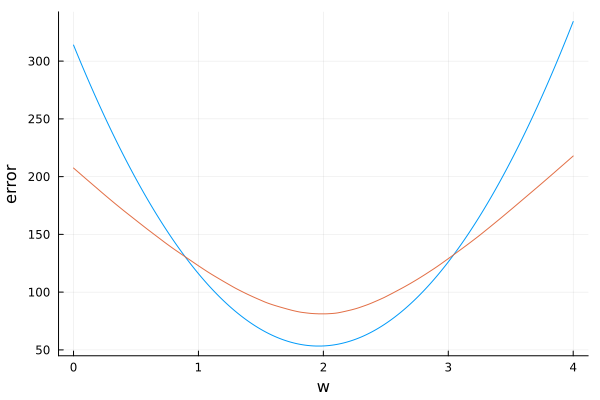

In [44]:
errors = Dict()
for w in 0:.01:4
    error = 0
    for (xi, yi) in zip(X, Y)
        error += abs(yi - w*xi)
    end
    errors[w] = error
end
plot!(errors, xaxis = ("w"), yaxis = ("error"), legend = false)

For now, we'll stick to sum of squares. Let's formally define and then expand SSE (Sum of Squared Error)

$SSE = \sum_{i = 0}^{N} (y_i - \hat{y_i})^{2}$

For this example we define $\hat{y_i} = w*x_i$
Let's take a step back and look at our model, in your general algebra 1 class you were probably asked to find the roots or zeros of a function by manipulating $x$. For our purposes $x_i$ and $y_i$ are constants, we cannot manipulate them. We can only manipulate $w$. We have names for $X$ and $Y$ (features and target), we also have a name for variables like $w$, parameters. In OLS (Ordinary Least Squares) problems, we want to find the parameters (in this case w) of a model that minimize the SSE (Sum of Squared Errors). Let's replace $\hat{y_i}$ with our equation.

$SSE = \sum_{i = 0}^{N} (y_i - w*x_i)^{2}$

Expanding the inside of the polynomial gives us

$SSE = \sum_{i = 0}^{N} (y_i^2 - 2*w*y_i*x_i + w^2 * x_i ^2)$

Getting closer to a regular parabola. Split up the summation.

$SSE = \sum_{i = 0}^{N} (y_i^2) + \sum_{i = 0}^{N} (- 2*w*y_i*x_i) + \sum_{i = 0}^{N} (w^2 * x_i ^2)$

Take out the terms that aren't being summed

$SSE = \sum_{i = 0}^{N} (y_i^2) - 2 * w \sum_{i = 0}^{N} (y_i*x_i) + w^2 * \sum_{i = 0}^{N} (x_i ^2)$

Reorder the terms

$SSE = w^2 * \sum_{i = 0}^{N} (x_i ^2) - 2 * w \sum_{i = 0}^{N} (y_i*x_i) + \sum_{i = 0}^{N} (y_i^2)$

And we get the shape we expected all along. SSE with this specific model can be described as quadratic function with respect to $w$. Remember, $X$ and $Y$ are constants in regard to the loss function. Remembering a little more from algebra 1, for this quadratic function, 

$A = \sum_{i = 0}^{N} (x_i ^2)$, 

$B = - 2 * \sum_{i = 0}^{N} (y_i*x_i)$

$C = \sum_{i = 0}^{N} (y_i^2)$

Because $A$ is the sum of squares of $X$ it's always going to be positive meaning the vertex is going to be the minimum value. Plot a few parabolas yourself, and you'll see this true.

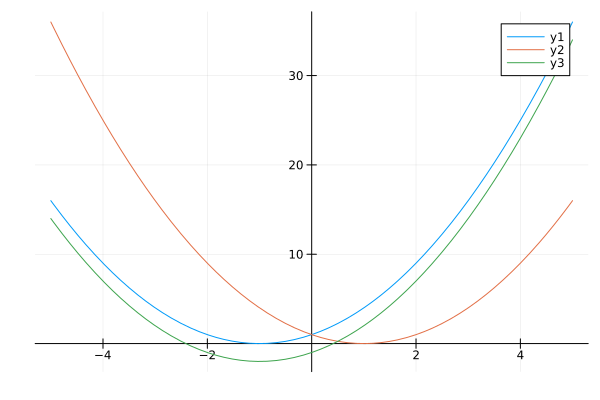

In [45]:
plot(x -> x^2 + 2*x + 1, framestyle = :origin); plot!(x -> x^2 - 2*x + 1); plot!(x -> x^2 + 2*x - 1)

The equation for the vertex is 

$\frac{-B}{2*A}$

Substituting the values for $B$ and $A$ we get

$\frac{\sum_{i = 0}^{N} (y_i*x_i)}{\sum_{i = 0}^{N} (x_i ^2)}$

In [46]:
sum((yi*xi) for (xi, yi) in zip(X, Y)) / sum(xi^2 for xi in X)

1.9624178096653309

Not exactly 2.0 but remember the noise in this data set effects our efforts in getting the true value of the function.

Lets consider another approach in minimizing SSE. You only need a little bit of calc 1 to get through this example but going forward you'll need a strong background in multivariate calculus. For the most part we'll derive the equation for the vertex.

We're going to take the derivative of the loss function with respect to w.

$SSE = \sum_{i = 0}^{N} (y_i - w*x_i)^{2}$

It's important to remember this is the loss of this model not of every model you come across.

Using the power and chain rule we can do this in one step.

$\frac{\partial SSE}{ \partial w} = 2 * \sum_{i = 0}^{N} (y_i - w*x_i)*(-x_i)$

Lets simplify this further

$\frac{\partial SSE}{ \partial w} = 2 * \sum_{i = 0}^{N} (w*x_i^2 - x_i * y_i)$

Seperate the terms

$\frac{\partial SSE}{ \partial w} = 2 * \sum_{i = 0}^{N} (w*x_i^2) - 2 * \sum_{i = 0}^{N} (x_i * y_i)$

Take out what can't be summed

$\frac{\partial SSE}{ \partial w} = 2w * \sum_{i = 0}^{N} (x_i^2) - 2 * \sum_{i = 0}^{N} (x_i * y_i)$

Can you see where this is going? Setting the derivative to 0 gives us the vertex of the polynomial which for reasons we have already established is a minimum, but within the context of calculus you can see that this point should be zero. If we take the second derivative of the equation we get 

$\frac{\partial^2 SSE}{ \partial^2 w} = 2 * \sum_{i = 0}^{N} (x_i^2)$

Which is a positive constant, in other words the second derivative of the turning point of the polynomial is going to be positive, therefore the turning point will be a minimum. This equation also only has one turning point with respect to $w$, therefore this turning point will be the global minimum of the function.

We get the turning point by setting the derivative to 0 and solving for w.

$2w * \sum_{i = 0}^{N} (x_i^2) - 2 * \sum_{i = 0}^{N} (x_i * y_i) = 0$

Add the second term to both sides

$2w * \sum_{i = 0}^{N} (x_i^2) = 2 * \sum_{i = 0}^{N} (x_i * y_i)$

divide the everything in the first term except $w$ on both sides

$w = \frac{\sum_{i = 0}^{N} (x_i * y_i)}{\sum_{i = 0}^{N} (x_i^2)}$

We get the equation we solved for before, so why did we go through the trouble of proving the minimum of SSE for this model?

Lets say instead of just solving for the slope we want the intercept too, ie. our model is

$\hat{y_i} = w*x_i + b$

Lets change the data accordingly.

The new truth ($f(x)$) is going to be $2x_i + 3$

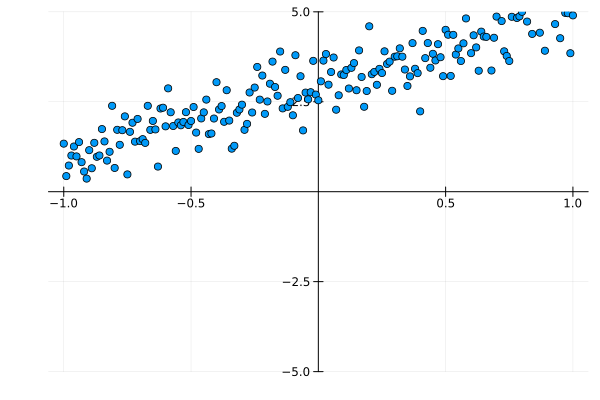

In [47]:
Y = 2 .* X .+ 3 .+ randn(length(X)) * 0.5
scatter(X, Y, ylims = (-5, 5), legend = false, framestyle = :origin)

We can plot the potential outputs of our old model

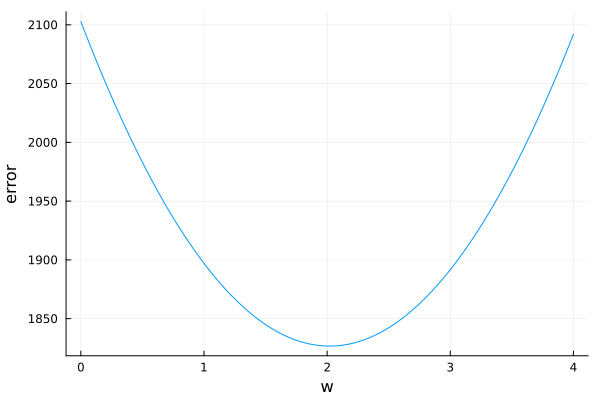

In [48]:
errors = Dict()
for w in 0:.01:4
    error = 0
    for (xi, yi) in zip(X, Y)
        error += (yi - w*xi)^2
    end
    errors[w] = error
end
plot(errors, xaxis = ("w"), yaxis = ("error"), legend = false)

Notice the error is higher than our previous fit.

We have 2 parameters now, ($w$ and $b$). Our objective is to minimize SSE with respect to both paramaters. We can't use our algebra 1 method for solving this equation. We're going to need some multivar going forward.

SSE is

$SSE = \sum_{i = 0}^{N} (y_i - \hat{y_i})^{2}$

Substituting our new model we get.

$SSE = \sum_{i = 0}^{N} (y_i - (w*x_i + b))^{2}$

Lets visualize the loss function given these 2 parameters

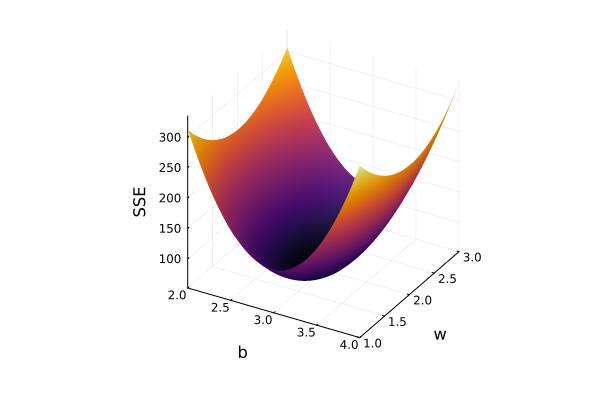

In [49]:
plot(2:.01:4, 1:.01:3, (b, w) -> sum((yi - w*xi - b)^2 for (xi, yi) in zip(X, Y)), st = :surface, xlabel = "b", ylabel = "w", zlabel = "SSE", legend = false)

The loss is a paraboloid. While their most likely is an equation for the vertex of a paraboloid, the moment we start increasing parameters that equation becomes useless. We want a general way of finding the solution for OLS given a model like this.

$SSE = \sum_{i = 0}^{N} (y_i - (w*x_i + b))^{2}$

Take the derivative with respect to w and b and solve for the parameters while setting the derivative to 0.

$\frac{\partial SSE}{ \partial b} = 2 * \sum_{i = 0}^{N} (y_i - w*x_i - b)*(-1)$

$0 = \sum_{i = 0}^{N} (w*x_i + b - y_i)$

$0 = w*\sum_{i = 0}^{N}(x_i) + \sum_{i = 0}^{N}(b) - \sum_{i = 0}^{N}(y_i)$

$\sum_{i = 0}^{N}(b) = \sum_{i = 0}^{N}(y_i) - w*\sum_{i = 0}^{N}(x_i)$

$bN = \sum_{i = 0}^{N}(y_i) - w*\sum_{i = 0}^{N}(x_i)$

$b = \frac{\sum_{i = 0}^{N}(y_i) - w*\sum_{i = 0}^{N}(x_i)}{N}$

This is ugly, let's fix that.
The bar above the variable means we are taking the algebraic mean (average) of that variable, In other words
$ \frac{\sum_{i = 0}^{N}(x_i)}{N} = \bar{x}$

$b = \bar{y} - w*\bar{x}$

We need to solve for w and insert this somewhere.

$\frac{\partial SSE}{ \partial w} = 2 * \sum_{i = 0}^{N} (y_i - w*x_i - b)*(-x_i)$

$0 = \sum_{i = 0}^{N} (y_i - w*x_i - \bar{y} + w*\bar{x})x_i$

$0 = \sum_{i = 0}^{N} (y_i - \bar{y})x_i - \sum_{i = 0}^{N} (w*x_i - w*\bar{x})x_i$

$\sum_{i = 0}^{N} (w*x_i - w*\bar{x})x_i = \sum_{i = 0}^{N} (y_i - \bar{y})x_i$

$w \sum_{i = 0}^{N} (x_i - \bar{x})x_i = \sum_{i = 0}^{N} (y_i - \bar{y})x_i$

$w  = \frac{\sum_{i = 0}^{N} (y_i - \bar{y})x_i}{\sum_{i = 0}^{N} (x_i - \bar{x})x_i}$

Plug that back in to $b$

$b = \bar{y} - \frac{\sum_{i = 0}^{N} (y_i - \bar{y})x_i}{\sum_{i = 0}^{N} (x_i - \bar{x})x_i}*\bar{x}$

Let's try it out


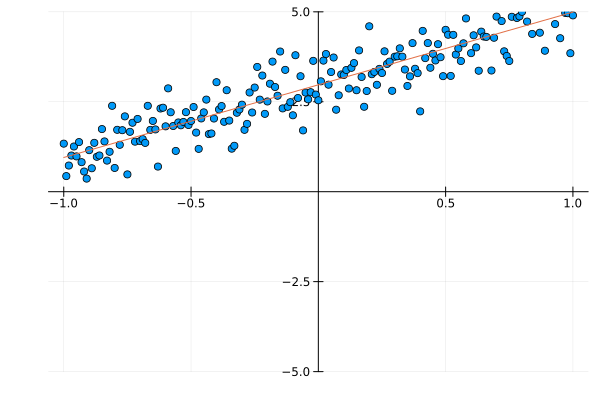

In [50]:
ybar = sum(Y) / length(Y)
xbar = sum(X) / length(X)
w = sum((yi - ybar)*xi for (xi, yi) in zip(X, Y)) / sum((xi - xbar)*xi for xi in X)
b = ybar - w*xbar
scatter(X, Y, legend = false, ylims = (-5, 5), framestyle = :origin)
plot!(x -> w*x + b)

In [51]:
("w" => w, "b" => b)

("w" => 2.0199647444294064, "b" => 2.971490925147424)

Compare this to the optimal solution found by our previous model

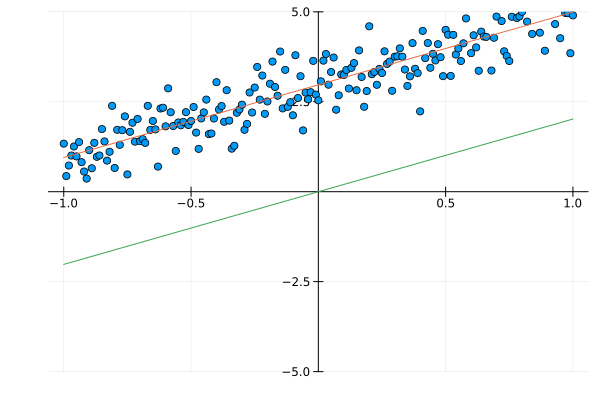

In [52]:
wo = sum((yi*xi) for (xi, yi) in zip(X, Y)) / sum(xi^2 for xi in X)
plot!(x -> w*x)

In [53]:
("w" => w)

"w" => 2.0199647444294064

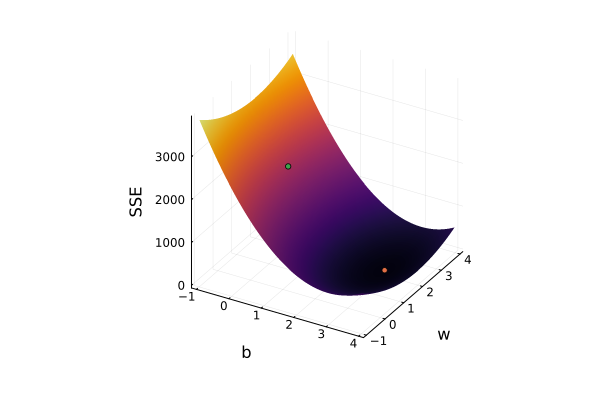

In [54]:
plot(-1:.01:4, -1:.01:4, (b, w) -> sum((yi - w*xi - b)^2 for (xi, yi) in zip(X, Y)), st = :surface, xlabel = "b", ylabel = "w", zlabel = "SSE", legend = false)
scatter!([b], [w], [sum((yi - w*xi - b)^2 for (xi, yi) in zip(X, Y))], markersize = 3, markerstrokewidth = 1)
scatter!([0], [wo], [sum((yi - wo*xi)^2 for (xi, yi) in zip(X, Y))], markersize = 3, markerstrokewidth = 1)

The orange point is our new model while the green is our old model.

Let's look back at the equations for w and b we got

$w  = \frac{\sum_{i = 0}^{N} (y_i - \bar{y})x_i}{\sum_{i = 0}^{N} (x_i - \bar{x})x_i}$

$b = \bar{y} - \frac{\sum_{i = 0}^{N} (y_i - \bar{y})x_i}{\sum_{i = 0}^{N} (x_i - \bar{x})x_i}*\bar{x}$

You might have seen different equations used to represent these parameters. If you haven't you might be wondering why we chose to use the mean of x and y within the equation. We have one more branch of math (you might find this specific opinion controversial) to introduce. My least favorite visitor, Statistics. 

Honestly it shouldn't be that surprising that we'd eventually encounter statistics, when looking at our original equation for what we expect our data to be

$y_i = f(x_i) + \epsilon_i$

Where $\epsilon_i$ is random, when we define the distribution of $\epsilon_i$ we get a different interpretation of OLS, SSE, and even SAE, Sum of Absolute Error.

Substituting our model $\hat{y_i} = w*x_i + b$ as an approximation of $f(x_i)$ we get

$y_i = w*x_i + b + \epsilon_i$ 

We can reorder this equation to be

$\epsilon_i = y_i - w*x_i - b$

Here's where we define the distribution of $\epsilon_i$, we can choose multiple but for now we'll use the normal distribution.

$\epsilon_i \sim Normal(0, \sigma^2)$

Knowing that adding a nonrandom variable to a normal distribution shifts the mean that amount we can also conclude that.

$y_i \sim Normal( w*x_i + b, \sigma^2)$

And through the use of maximum likelihood estimation, we can derive equations for these parameters. In a basic sense, maximum likelihood estimation is a method of finding the parameters of distribution that maximize the likelihood (straightforward I know) that some set of data follows said distribution. Given this distribution for $y_i$ we can conclude the probability of $y_i$ given $x_i$, $w$, and $b$ is

$p(y_i | x_i; w, b, \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{-(\frac{y_i - (w*x_i + b)}{\sigma})^2}$

I might be losing you, this next part isn't getting any simpler. If you want a statistical understanding of these concepts you need a strong understanding of statistics. PennState offers course notes for its online versions of STAT 414 (Introduction to Probability Theory) and STAT 415 (Introduction to Mathematical Statistics). I'd recommend you read through all of it but here are some entry points for understanding the concept of maximum likelihood estimation

https://online.stat.psu.edu/stat414/lesson/8

https://online.stat.psu.edu/stat414/lesson/16

https://online.stat.psu.edu/stat415/lesson/1/1.2

Essentially, we want to maximize the likelihood that the data comes from the normal distribution. The likelihood of data is multiplication of the probabilities of each individual data point given that if is from said distribution. We have the probability of $y_i$ given $x_i$ with parameters $w$ and $b$. Thus the likelihood is 

$\prod^{N}_{i = 0} p(y_i | x_i; w, b, \sigma^2)$

Which is equivalent to

$\prod^{N}_{i = 0} \frac{1}{\sqrt{2\pi\sigma^2}}e^{-(\frac{y_i - (w*x_i + b)}{\sigma})^2}$

The likelihood the data comes from a distribution where $w$, $b$, and $\sigma$ are 1.5, 2, and 1 respectively

In [55]:
w = 2
b = 1.5
σ = 1
prod([1/sqrt(2*pi) * exp(-1*((y -(w*x + b)) / σ)^2) for (x, y) in zip(X, Y)])

1.6517281145334849e-292

Looks pretty low but remember probabilities are between 1 and 0, and we are multiplying 201 of them. Fixing $b$ and $\sigma$ at 1.5 and 1, we can plot the likelihoods of the distribution at different values of $w$ as  

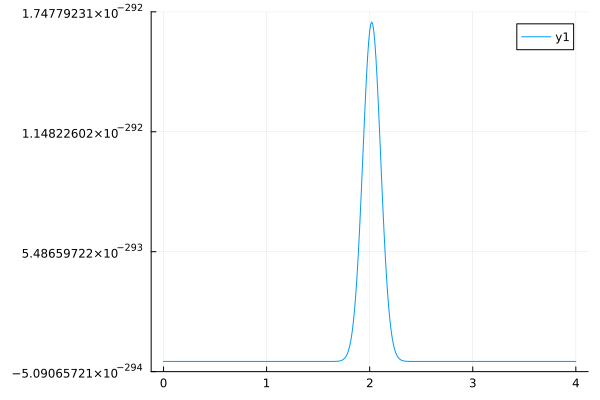

In [56]:
plot(0:.01:4, [prod([1/sqrt(2*pi) * exp(-1*((y -(w*x + b)) / σ)^2) for (x, y) in zip(X, Y)]) for w in 0:.01:4])

By finding the combination of $w$ and $b$ that maximize the value of the likelihood, we get very close to the true value of the parameters.

So how do we go about doing this?

Taking the log of this expression gives us the log likelihood

$\sum^{N}_{i=0} ln(\frac{1}{\sqrt{2\pi\sigma^2}}) -(\frac{y_i - (w*x_i + b)}{\sigma})^2$

Expanding this out a little gives us

$ln(\frac{1}{\sqrt{2\pi\sigma^2}})*N + \sum^{N}_{i=0} -(\frac{y_i - (w*x_i + b)}{\sigma})^2$

Thus maximizing the log likelihood with respect to $w$ and $b$ means minimizing 

$\sum^{N}_{i=0} (\frac{y_i - (w*x_i + b)}{\sigma})^2$

Which is getting really close to our original SSE minimization problem. We can manipulate the expression a little more.

$\sum^{N}_{i=0} (\frac{(y_i - (w*x_i + b)) ^ 2}{\sigma^2})$

$\frac{1}{\sigma^2}\sum^{N}_{i=0} (y_i - (w*x_i + b)) ^ 2$

And when we minimize this function with respect to the derivatives of $w$, $b$, and $\sigma$ becomes irrelevant. Thus we get our original problem.

$\sum^{N}_{i=0} (y_i - (w*x_i + b)) ^ 2$

Notice how our model is self-contained thought the entire derivation. There's no $w$'s or $b$'s spilling everywhere. This derivation can be extended to most models of this form. In other words, minimizing SSE for some deterministic model $\hat{y_i}$ is equivalent to treating the errors as independent and identically distributed variables with a Normal Distribution. Consider another choice for our distribution, the Laplace or double exponential distribution. Given this choice the probability of $y_i$ becomes

$p(y_i|x_i; w, b, \lambda) = \frac{1}{2\lambda} e^{-\frac{| y_i - (w*x+b) |}{\lambda}}$

In which maximizing the log likelihood becomes minimizing

$\sum^N_{i=0} | y_i - (w*x+b) |$

Or our Sum of Absolute Errors

We have to make one last introduction, from this point on we'll be using linear algebra to preform a multi variable linear regression using the model

$\hat{y}_i = w ^ T x_i$

We make two crucial distinctions about our parameters and data. While we previously treated $X$ as a vector and $x_i$ as a scaler, we now will treat $X$ as a matrix and $x_i$ as row vector of $X$, for example, take the matrix below.

$\begin{bmatrix}
1 & 2 \\
3 & 4 \\
5 & 6
\end{bmatrix}$

$x_1$ is going to be the vector $<1, 2>$,

$x_2$ is $<3, 4>$

$x_3$ is $<5, 6>$

Because each row vector has 2 elements, and there are 3 vectors, we consider $X \in R^{3 \times 2}$ and $x_i \in R^2$.

As $x_i$ is in $R^2$, in order for $w^T x_i$ to be valid $w$ needs to also be in $R^2$

Let's go over what $w^T x_i$ is, we refer to this one vector multiplied by the transpose of another vector as an inner product, and for this case, the dot product.

We can represent this as $\sum^{m}_j w_j * x_{i,j}$, or for our example in $R^2$

 $w_1 * x_{i, 1} + w_2 * x_{i, 2}$

For our example $x_1$, if $w = <10, 11>$ then $w^T x_1$ is equal to

$10 * 1 + 11 * 2$

We've been dealing with a single vector. We haven't been dealing with multiple features yet, but if we rethink our previous problem we can see an immediate application of viewing our problem like this. 

Instead of representing $X$ as 

$\begin{bmatrix}
1 \\
2 \\
3
\end{bmatrix}$

We will now refer to this vector as $x_v$

If we add a column of ones we get 

$\begin{bmatrix}
1 & 1\\
2 & 1 \\
3 & 1
\end{bmatrix}$

And when we take $w^T x_i$ we get 

$w_1 * x_{i, 1} + w_2*1$ or simply

$w_1 * x_{i, 1} + w_2$ which is the same is equivalent to our previous model

$w * x_{v, i} + b$

If we add another column $x_i^2$ we get the matrix

$\begin{bmatrix}
1 & 1 & 1\\
4 & 2 & 1 \\
9 & 3 & 1
\end{bmatrix}$

$w_1 * x_{i, 1} + w_2 * x_{i, 2} + w_3$

which is equivalent to

$w_1 * x_{v, i}^2 + w_2 * x_{v, i} + b$

Which means we can now fit quadratic functions accurately.

We can add more columns to fit data to nearly any polynomial, but we're getting a little ahead of ourselves, let's derive the closed form solution for this problem.

Looking at our regular SSE formula we have

$\sum^N_i (y_i - w^T x_i)^2$

$w^T X$ is going to be a vector of each of the inner product of the row vectors of the matrix X and w, or

$\begin{bmatrix}
w ^ T x_1 \\
w ^ T x_2 \\
w ^ T x_3 \\
...
\end{bmatrix}$

and we already know that $Y$ corrosponds to 

$\begin{bmatrix}
y_1 \\
y_2 \\
y_3 \\
...
\end{bmatrix}$

So $Y - w X$ is equivalent to

$\begin{bmatrix}
y_1 - w ^ T x_1 \\
y_2 - w ^ T x_2 \\
y_3 - w ^ T x_3 \\
...
\end{bmatrix}$

and

$\sum^N_i (y_i - w^T x_i)$

Is just the sum of the elements in the vector $Y - w^T X$ or the inner product of 

$(Y - w X)^T \: \overrightarrow{1}$

Where $\overrightarrow{1}$ is just a vector of ones or $<1, 1, 1, 1, ...>$ to whatever dimension $(Y - w X)$

Notice we haven't squared the errors yet.

$\sum^N_i (y_i - w^T x_i)^2$ is equivalent to $(Y - w X)^T (Y - w X)$

Going back to our matrix

$Y - w X$ is 


$\begin{bmatrix}
y_1 - w ^ T x_1 \\
y_2 - w ^ T x_2 \\
y_3 - w ^ T x_3 \\
...
\end{bmatrix}$

Thus $(Y - w X)^T (Y - w X)$

is 

$(y_1 - w ^ T x_1) * (y_1 - w ^ T x_1) + (y_2- w ^ T x_2) * (y_2 - w ^ T x_2) ...$

Which is equivalent to $\sum^N_i (y_i - w^T x_i)^2$

So 

$SSE = (Y - w X)^T (Y - w X)$

As we go on, you'll be able to see some similarities between multiplication, inner products, and the properties of transposes. There are alot of properties of matrix multiplication and transposes that can be unintuitive so lets take this step by step.

$SSE = (Y - w X)^T (Y - w X)$

We distribute the first transpose to the terms of the first parenthetical

$SSE = (Y^T - X^T w^T) (Y - w X)$

We foil the expression like we would an algebraic polynomial

$SSE = Y^T Y - Y^T w X - X^T w^T Y - X^T w^T w X$

We observe that $Y^T w X$ and $X^T w^T Y$ both simplify to a variable in $R^1$ and that $(X^T w^T Y) ^ T = Y^T w X$. Let's say they both evaluate to some value $a$. The equation becomes $a^T = a$ where $a \in R^1$. The transpose of elements in the set $R^1$ is equal to the element. Thus, $X^T w^T Y = Y^T w X$ and

$SSE = Y^T Y - 2Y^T w X + X^T w^T w X$

Taking the gradient with respect to $w$ gives us

$\frac{\partial SSE}{\partial w} = -2Y^T X + 2 X^T w^T X$

For some intuition on this $w^T w$ could be thought of as $w^2$

Set the gradient to 0

$0 = -2Y^T X - 2 X^T X w$

Take out the constants

$0 = -Y^T X + X^T X w$

Solve for w

$Y^T X = X^T X w$

$X^T X w = Y^T X$

$w = (X^T X)^{-1} Y^T X$

And we have our general solution for multivariable linear regressions

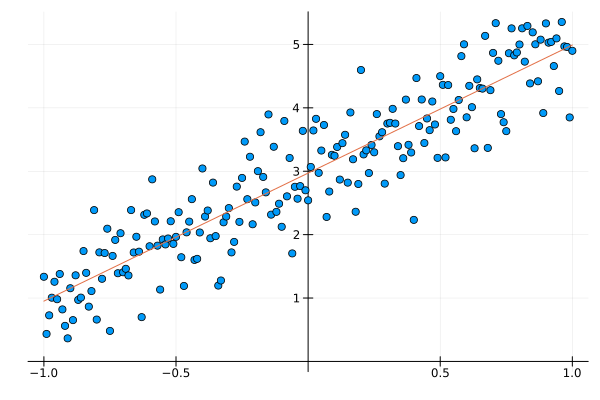

In [57]:
xv = X
Xn = hcat(xv, X .^ 0)
w = inv(Xn'Xn)*Xn'Y
scatter(X, Y, framestyle = :origin, legend = false)
plot!(x -> w[1]*x + w[2])

In [58]:
"y = $(w[1])x + $(w[2])", "SSE = $((Y - Xn*w)' * (Y - Xn*w))"

("y = 2.0199647444294087x + 2.971490925147423", "SSE = 51.8970131427807")

Using this same method, lets try fitting quadtratic data

y = 1.9775956644033128x + 1.9902318689281158 SSE = 167.09835002975353

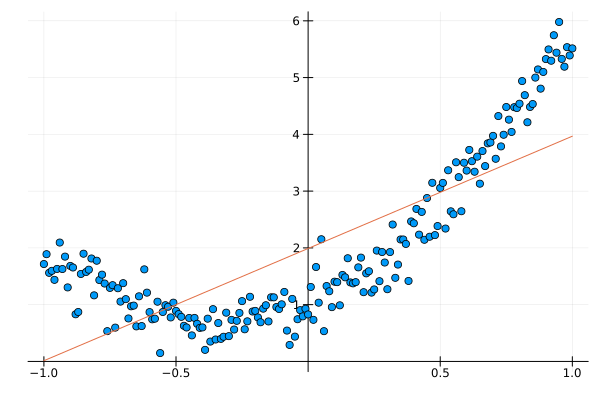

In [59]:
xv = X
Y = 3 .* xv .^ 2 + 2 .* xv .+ 1 .+ randn(length(X)) * 0.3
Xn = hcat(xv, X .^ 0)
w = inv(Xn'Xn)*Xn'Y
scatter(X, Y, framestyle = :origin, legend = false)
print("y = $(w[1])x + $(w[2])", " SSE = $((Y - Xn*w)' * (Y - Xn*w))")
plot!(x -> w[1]*x + w[2])

Lets add an $x^2$ column to our matrix

y = 3.047025916094448x^2 + 1.9767385274041585x + 0.989739981181494 SSE = 17.287928758692843

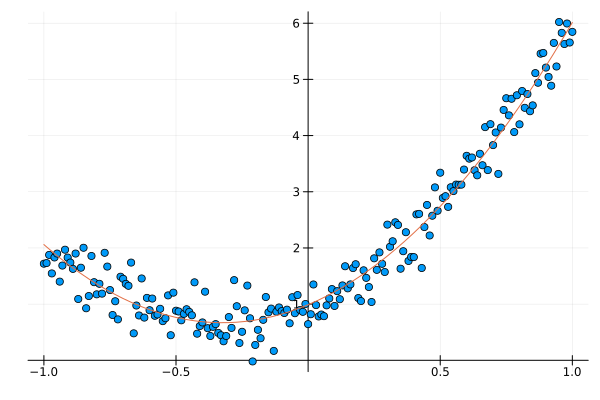

In [60]:
xv = X
Y = 3 .* xv .^ 2 + 2 .* xv .+ 1 .+ randn(length(X)) * 0.3
Xn = hcat(xv .^2, xv, X .^ 0)
w = inv(Xn'Xn)*Xn'Y
scatter(X, Y, framestyle = :origin, legend = false)
print("y = $(w[1])x^2 + $(w[2])x + $(w[3])", " SSE = $((Y - Xn*w)' * (Y - Xn*w))")
plot!(x -> w[1]*x^2 + w[2]*x + w[3])

One of the most important realizations you should make about linear regression and other linear methods is that the word "linear" refers to the linear combination of variables. Given the right <b>feature engineering</b>, remember we call the columns of our data matrix $X$ features, we can model more than just lines. Adding a $x^2$ and constant column does not make this nonlinear, it just makes it not a line. Despite their linearity, this family of models is more than capable of producing a large variety of versatile regressions. 